In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Data Loading

In [3]:
space_data=pd.read_csv('space server dataset.csv')

### EDA

In [4]:
space_data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [5]:
space_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


Obs: Dataset contains float ,int,object values

In [5]:
space_data.shape

(10000, 18)

In [6]:
space_data.isna().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

Obs: No NaN values

In [6]:
space_data[space_data.iloc[:,:]=='?'].count()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

Obs: No '?' values present

In [8]:
space_data.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

Obs: No null values present

In [9]:
space_data.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


Obs: 1. objid and rerun columns have only one value

2. dec and redshift has negative values

3. The gap between 75% and maximum is greater in cafibreid,plate,redshift,specobjid therefore these attributes contains outliers

4. dec and redshift columns contains negative values

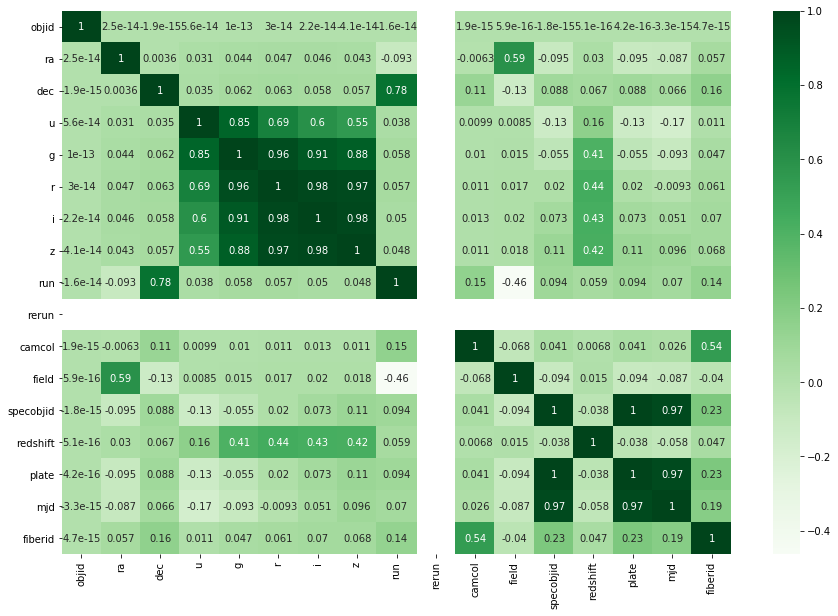

In [10]:
plt.figure(figsize=(15,10))
import seaborn as sb
sb.heatmap(space_data.corr(),annot=True,cmap='Greens')

Obs: column pairs (plate,mjd) , (mjd,spaceobjid) have very  high multicollinearity issue

All telescope bands have very high correlation between each other

Fiberid is also quite strongly correlated with cameracol

In [11]:
space_data['rerun'].unique()

array([301], dtype=int64)

In [12]:
space_data['objid'].unique()

array([1.23765e+18])

In [7]:
#dropping objid and rerun since both have single value in both and removing multicollinearity issue
space_data.drop(['objid','rerun','mjd'],inplace=True,axis=1)

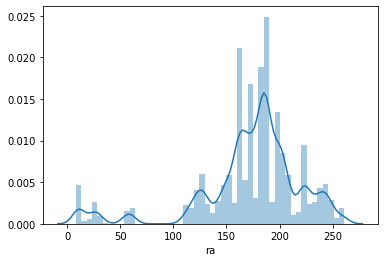

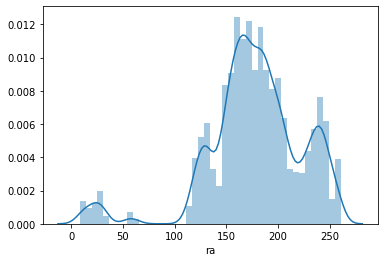

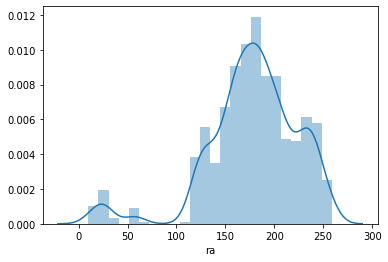

In [14]:
#viewing distribution of Right ascension for all classes--Univariate analysis
for i in ['STAR','GALAXY','QSO']:
    plt.subplots()
    sb.distplot(space_data[space_data['class']==i]['ra'])

The distribution of Right ascension distance is almost similar in all the classes

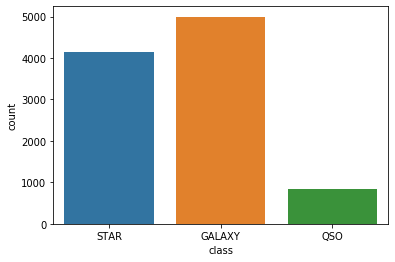

In [15]:
#viewing the count of all classes
sb.countplot(x='class',data=space_data)

Obs: Galaxy is most in number followed by star and Quasar

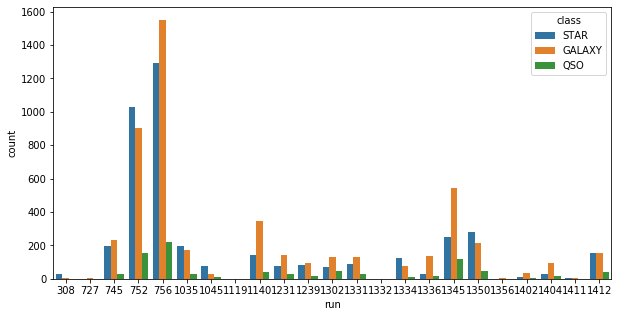

In [16]:
#checking run number for all classes---bivariate analysis
plt.figure(figsize=(10,5))
sb.countplot(x='run',hue='class',data=space_data)

Obs: 756 is the most favourble run number for all classes followed by 752 and 745

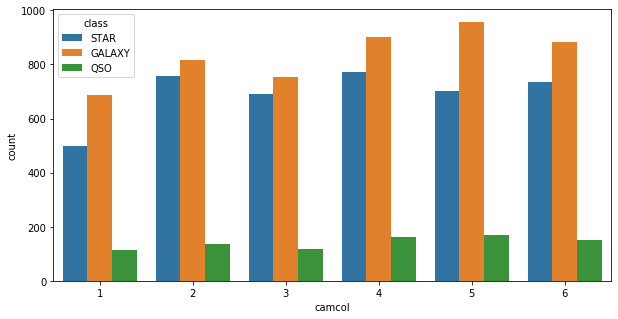

In [17]:
# checking the classes count with respect to camera column
plt.figure(figsize=(10,5))
sb.countplot(x='camcol',hue='class',data=space_data)

Obs: At each cameral column the the counts of all classes are same

Text(0, 0.5, 'Right ascension')

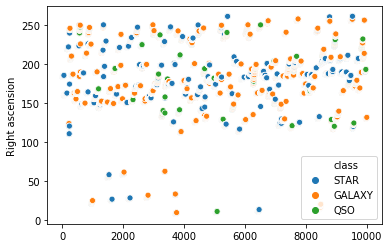

In [18]:
#checking the spread of Right ascension distance for all classes
sb.scatterplot(x=space_data.index,y='ra',hue='class',data=space_data)
plt.ylabel('Right ascension')

Obs: All classes have almost similar distibution of Right ascension distance

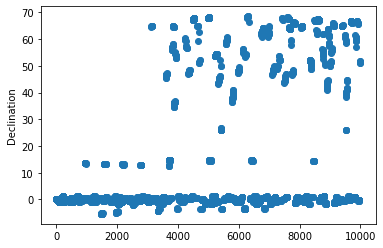

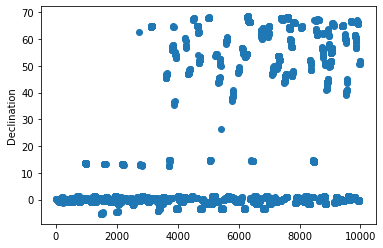

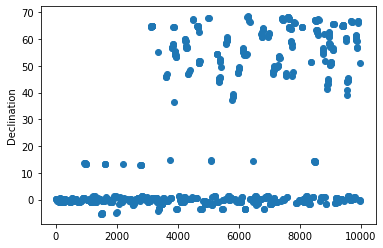

In [19]:
#checking the spread of declination  for all classes
for i in ['STAR','GALAXY','QSO']:
    df=space_data[space_data['class']==i]
    plt.subplots()
    plt.scatter(x=df.index,y=df['dec'])
    plt.ylabel('Declination')

Obs: Distribution of dec values are almost similar for all classes

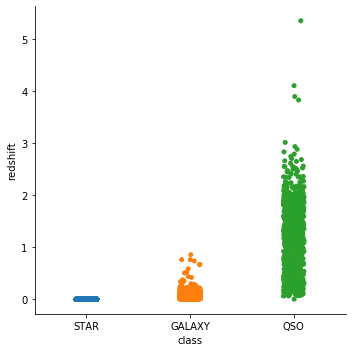

In [20]:
#observing red shift in context of class
sb.catplot(x='class',y='redshift',data=space_data)

Obs: redshift for star is confined to around 0 , for Galaxy it is in range 0 to 1 and for Quasar it is from 0 to 6

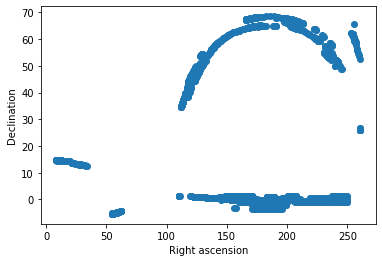

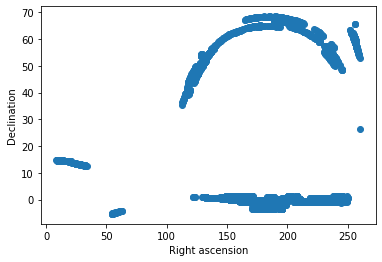

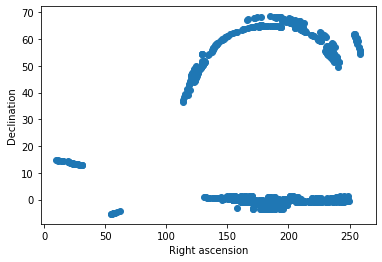

In [21]:
# multvariate analysis of RA vs Dec for all classes
for i in ['STAR','GALAXY','QSO']:
    df=space_data[space_data['class']==i]
    plt.subplots()
    plt.scatter(x=df['ra'],y=df['dec'])
    plt.ylabel('Declination')
    plt.xlabel('Right ascension')

Obs: RA vs Declination for all classes seems almost same 

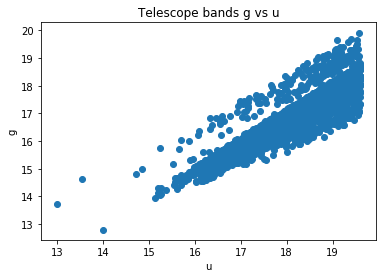

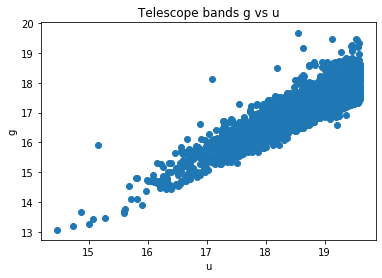

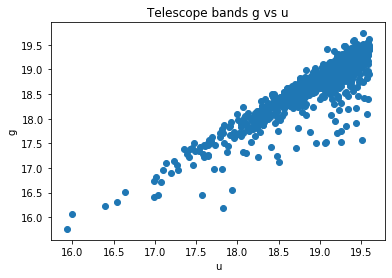

In [22]:
# checking the correlation of telescope bands with respect to each other
for i in ['STAR','GALAXY','QSO']:
    df=space_data[space_data['class']==i]
    plt.subplots()
    plt.scatter(x=df['u'],y=df['g'])
    plt.title('Telescope bands g vs u')
    plt.ylabel('g')
    plt.xlabel('u')

Obs: band 'u' and 'g' is positively correlated with declination for all classes

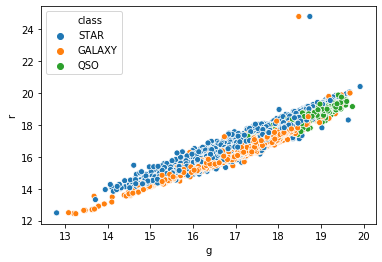

In [23]:
sb.scatterplot(x='g',y='r',hue='class',data=space_data)

Obs: change is r is also very strongly related to change in g

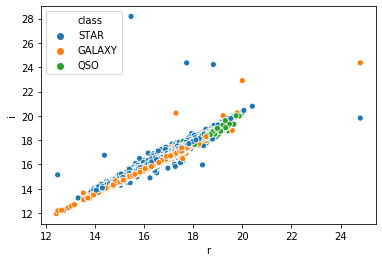

In [24]:
sb.scatterplot(x='r',y='i',hue='class',data=space_data)

Obs: change is r is strongly related to i only till 21 r

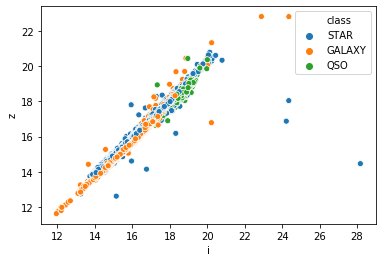

In [25]:
sb.scatterplot(x='i',y='z',hue='class',data=space_data)

Obs: i is also strongly positively related to z till 21 i

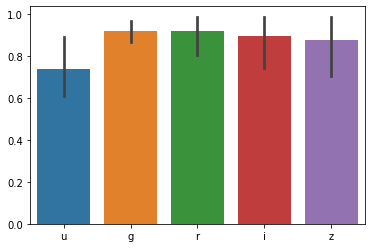

In [26]:
#checking correlation with respect to each other
sb.barplot(data=space_data.iloc[:,[2,3,4,5,6]].corr())

Obs: All telescope bands are strongly positively correlated to each other with u being least correlated among all

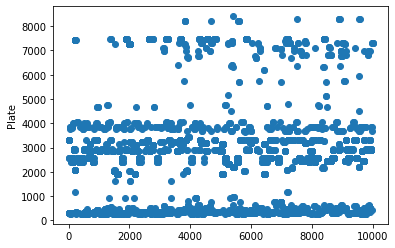

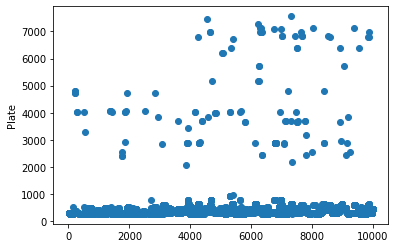

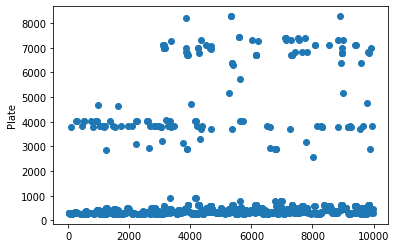

In [27]:
# checking the spread of plate data points for all classes
for i in ['STAR','GALAXY','QSO']:
    df=space_data[space_data['class']==i]
    plt.subplots()
    plt.scatter(x=df.index,y=df['plate'])
    plt.ylabel('Plate')

Obs: The plate number for stars are greater than that for Galaxy and Quasar

In [28]:
space_data.head()

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,STAR,-0.000009,3306,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,STAR,-0.000055,323,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,GALAXY,0.123111,287,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,STAR,-0.000111,3306,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,STAR,0.000590,3306,512


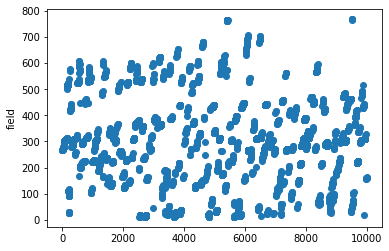

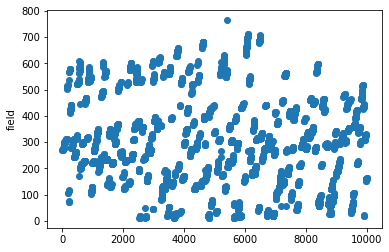

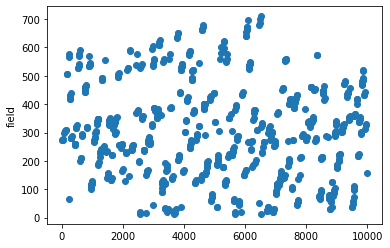

In [29]:
#checking the spread of field  for all classes
for i in ['STAR','GALAXY','QSO']:
    df=space_data[space_data['class']==i]
    plt.subplots()
    plt.scatter(x=df.index,y=df['field'])
    plt.ylabel('field')

Obs: The field data spread is also almost similar for all classes

#### Encoding the String data

In [30]:
from sklearn.preprocessing import LabelEncoder
space_data['class']=LabelEncoder().fit_transform(space_data['class'])

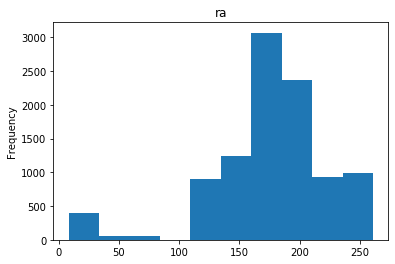

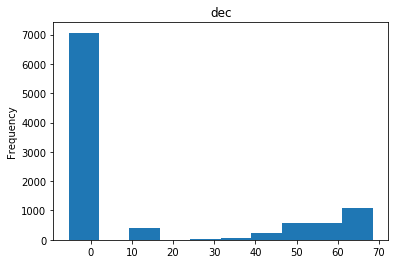

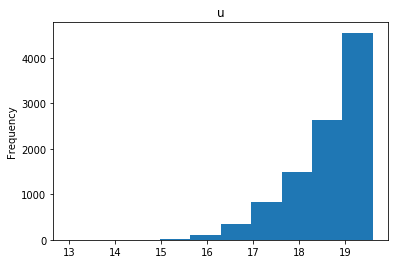

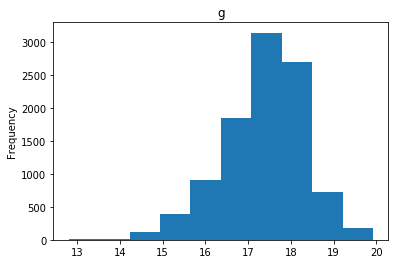

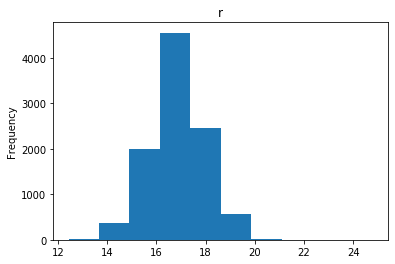

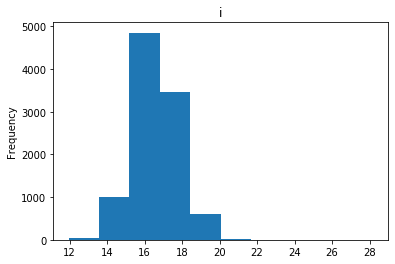

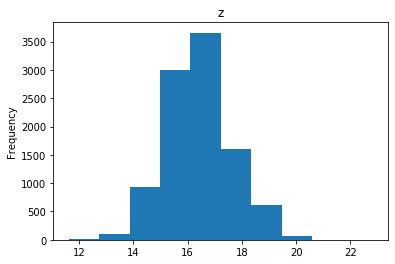

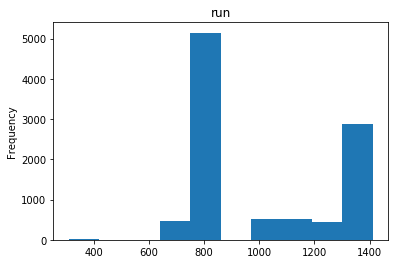

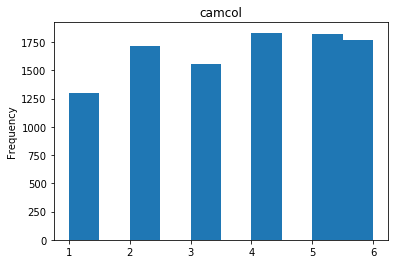

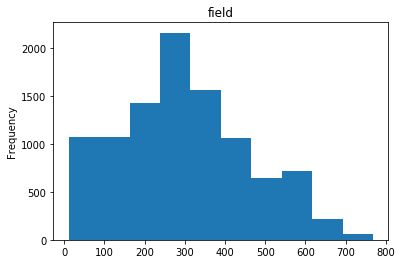

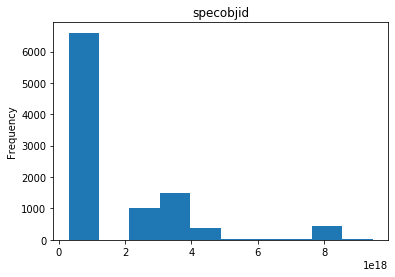

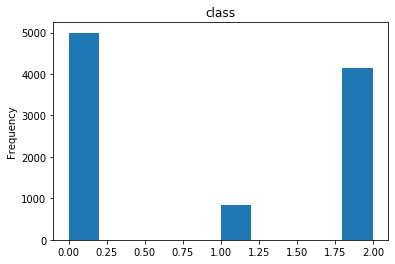

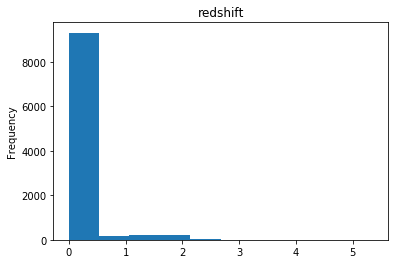

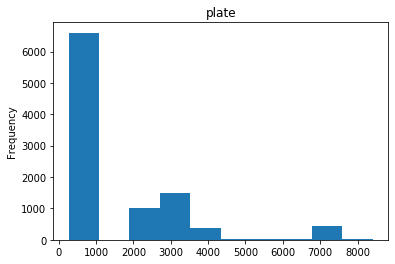

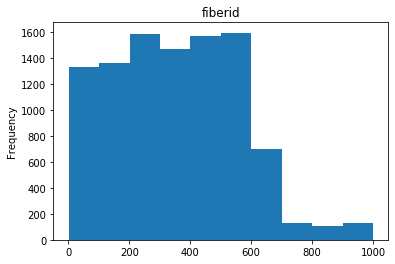

In [31]:
#viewing distribution of each attribute
for i in space_data.columns:
    plt.subplots()
    plt.title(i)
    space_data[i].plot.hist()

Obs: The distribution for all Telescope bands resembles to normal distribution

Most Right Ascension distnace is in range 150 to 200

In most of the cases dec value is '0'

800 and 1400 are the most occuring values for run attribute

Most occuring Redshift is '0'

#### checking the outliers:

ra              AxesSubplot(0.125,0.657941;0.133621x0.222059)
dec          AxesSubplot(0.285345,0.657941;0.133621x0.222059)
u             AxesSubplot(0.44569,0.657941;0.133621x0.222059)
g            AxesSubplot(0.606034,0.657941;0.133621x0.222059)
r            AxesSubplot(0.766379,0.657941;0.133621x0.222059)
i               AxesSubplot(0.125,0.391471;0.133621x0.222059)
z            AxesSubplot(0.285345,0.391471;0.133621x0.222059)
run           AxesSubplot(0.44569,0.391471;0.133621x0.222059)
camcol       AxesSubplot(0.606034,0.391471;0.133621x0.222059)
field        AxesSubplot(0.766379,0.391471;0.133621x0.222059)
specobjid          AxesSubplot(0.125,0.125;0.133621x0.222059)
class           AxesSubplot(0.285345,0.125;0.133621x0.222059)
redshift         AxesSubplot(0.44569,0.125;0.133621x0.222059)
plate           AxesSubplot(0.606034,0.125;0.133621x0.222059)
fiberid         AxesSubplot(0.766379,0.125;0.133621x0.222059)
dtype: object

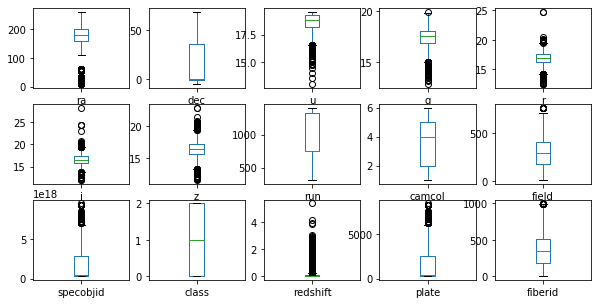

In [32]:
space_data.plot(kind='box',subplots=True,layout=(3,5),figsize=(10,5))

Obs: Attributes redshift,,plate,all telescope bands,ra,specobjid has outiers

#### Dealing with outliers

In [33]:
from scipy.stats import zscore
z=abs(zscore(space_data))
spacedata_no_outliers=space_data[(z<3).all(axis=1)]
print(space_data.shape)
print(spacedata_no_outliers.shape,'\n',space_data.shape[0]-spacedata_no_outliers.shape[0],' rows removed as outliers')

(10000, 15)
(8698, 15) 
 1302  rows removed as outliers


In [34]:
#checking skewness:
spacedata_no_outliers.skew()

ra          -0.130951
dec          1.212911
u           -0.981103
g           -0.528033
r           -0.153454
i            0.055966
z            0.167256
run          0.518602
camcol      -0.141193
field        0.220032
specobjid    1.320102
class        0.292107
redshift     4.951700
plate        1.320088
fiberid      0.065374
dtype: float64

#### Dealing with skewness

In [35]:
from sklearn.preprocessing import PowerTransformer
for i in spacedata_no_outliers.columns:
    #if((abs(spacedata_no_outliers[i].skew())>0.55) & (i!='specobjid') & (i!='plate') ):
    if(spacedata_no_outliers[i].skew()>0.55 ):
        spacedata_no_outliers.loc[:,[i]]=np.cbrt(spacedata_no_outliers.loc[:,[i]])
    if(spacedata_no_outliers[i].skew()<-0.55 ):
        spacedata_no_outliers.loc[:,[i]]=np.log(spacedata_no_outliers.loc[:,[i]])

In [36]:
spacedata_no_outliers.skew()

ra          -0.130951
dec          0.598346
u           -1.067045
g           -0.528033
r           -0.153454
i            0.055966
z            0.167256
run          0.518602
camcol      -0.141193
field        0.220032
specobjid    0.878014
class        0.292107
redshift     0.383962
plate        0.877994
fiberid      0.065374
dtype: float64

Obs: Most Skewness is handled

### Model preparation:

In [37]:
# importing libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc,f1_score,precision_score,recall_score
import warnings
warnings.filterwarnings('ignore')

In [38]:
# preparing a method to get accuracy at best random state
def classification_bestrandomstate(x,y,test_size,model):
    max=0
    ind=0
    for i in range(0,100):
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=test_size,random_state=i,stratify=y)
        model.fit(train_x,train_y)
        pred=model.predict(test_x)
        if(max < accuracy_score(test_y,pred)):
                max=accuracy_score(test_y,pred)
                ind=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=test_size,random_state=ind,stratify=y)
    model.fit(train_x,train_y)
    pred=model.predict(test_x)
    print('Best Accuracy score :\n',accuracy_score(test_y,pred),'at random state',ind)
    print('\nclassification_report :\n',classification_report(test_y,pred))
    print('\nconfusion_matrix :\n',confusion_matrix(test_y,pred))
    acc_score.append(accuracy_score(test_y,pred))
    print('\n\n')

In [39]:
X=spacedata_no_outliers.drop(['class'],axis=1)
Y=spacedata_no_outliers['class']

In [41]:
acc_score=[]
cross_val_score_=[]
models=[KNeighborsClassifier(),DecisionTreeClassifier(),SVC()]
for i,k in zip(models,['KNeighbor','DecisionTree','SVC']):
    print('$$$$$$$$$$$$$$$$$$$$$$$$$$$$$',k,'$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$')
    classification_bestrandomstate(X,Y,0.3,i)
    score_=cross_val_score(i,X,Y,cv=10,scoring='accuracy')
    cross_val_score_.append(score_.mean())

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ KNeighbor $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Best Accuracy score :
 0.8333333333333334 at random state 67

classification_report :
               precision    recall  f1-score   support

           0       0.79      0.96      0.87      1432
           1       0.00      0.00      0.00       124
           2       0.92      0.77      0.84      1054

    accuracy                           0.83      2610
   macro avg       0.57      0.57      0.57      2610
weighted avg       0.81      0.83      0.81      2610


confusion_matrix :
 [[1368    6   58]
 [ 112    0   12]
 [ 245    2  807]]



$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ DecisionTree $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
Best Accuracy score :
 0.9881226053639847 at random state 51

classification_report :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1432
           1       0.91      0.87      0.89       124
           2       1.00      1.00      1.00      1054

   

In [42]:
pd.DataFrame([acc_score,cross_val_score_],index=['Accuracy_score','cross_valscore'],columns=['KNeighbor','DecisionTree','SVC'])

,KNeighbor,DecisionTree,SVC
Accuracy_score,0.833333,0.988123,0.834866
cross_valscore,0.780648,0.982870,0.825942


Obs: DecisionTree is not overfitted/underfitted.DecisionTree is giving best results  with mean cross val score of 98 % and best accuracy of 98.7%

#### Since accuracy given by DecisionTree is very high hence we can choose this as final model without going for grid search and ensemble techniques for boosting up the score

In [44]:
from sklearn.externals import joblib
model=DecisionTreeClassifier()
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.3,random_state=24,stratify=Y)
model.fit(train_x,train_y)
pred=model.predict(test_x)
print('Accuracy score :\n',accuracy_score(test_y,pred))
joblib.dump(model,'space_server_dataset_model.obj')

Accuracy score :
 0.9877394636015325


['space_server_dataset_model.obj']